In [4]:
# Load pickled data
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
from scipy import misc
### Feel free to use as many code cells as needed.
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
  
X, y = train['features'], train['labels']
X, y = shuffle(X, y)

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30) #, random_state=52)

X_test, y_test = test['features'], test['labels']


Sample test images:  23%|██▎       | 10/43 [00:02<00:09,  3.57labels/s]
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Sample test images: 100%|██████████| 43/43 [00:12<00:00,  3.12labels/s]


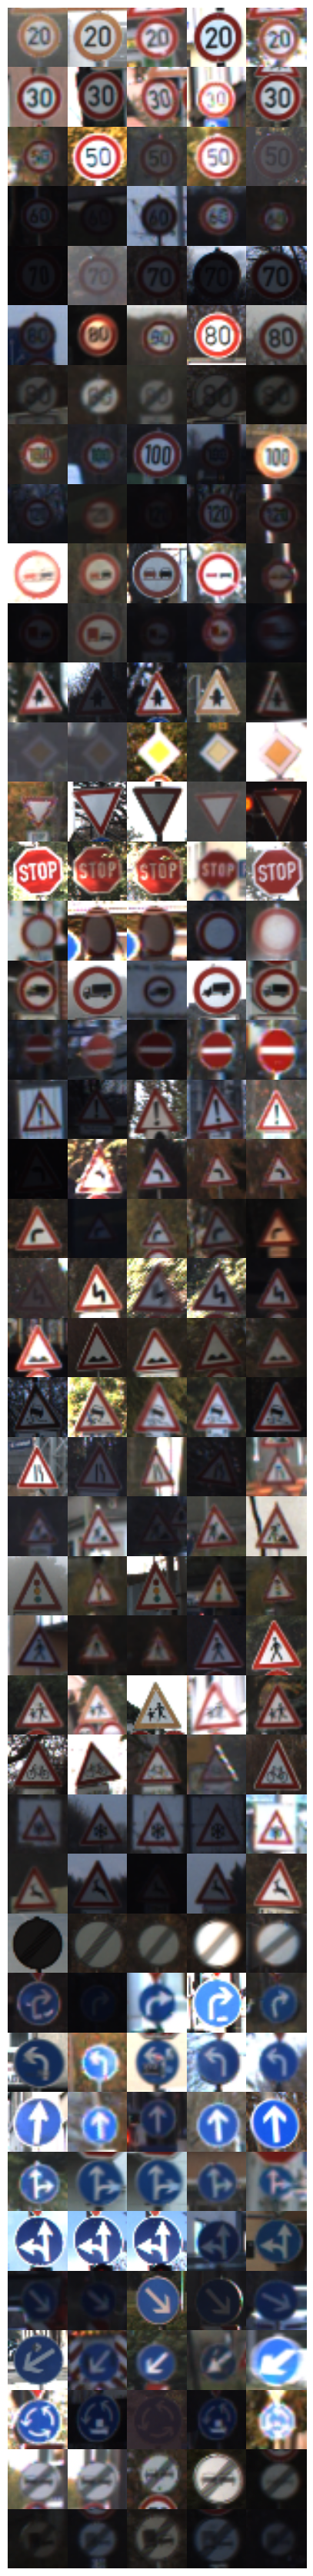

In [5]:
import matplotlib.gridspec as gridspec
from tqdm import tqdm

sample_size = 5 #five images per class label
n_labels = 43
count = 0 #book keeping for plots
fig = plt.figure(figsize=(sample_size, n_labels))
grid = gridspec.GridSpec(n_labels, sample_size, wspace=0.0, hspace=0.0)
label_progress = tqdm(range(n_labels), desc='Sample test images', unit='labels')
for i in label_progress:
    ind = y_train == i
    subset_x = X_train[ind,] #get all images that belong to class i
    for x in range(sample_size):
        img = random.choice(subset_x) #randomly pick on image from class i
        ax = plt.Subplot(fig, grid[count])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img, cmap='gray')
        fig.add_subplot(ax)
        count +=1
    # hide the borders
    if i == (n_labels-1):
        all_axes = fig.get_axes()
        for ax in all_axes:
            for sp in ax.spines.values():
                sp.set_visible(False)
plt.show()        